This part is used to test the get_field functiona and verify the interpolation strategy of Lumerical FDTD, be aware to check the interpolation of FDTD is set to None at the beginning

In [1]:
import lumapi
from Lumerical_methods.lumerical_scripts import get_field

In [2]:
path = 'D:\\program\\adjoint_method\\lumopt_standard\\lumopt\\examples\\Ysplitter\\opts_7\\forward_0'
fdtd = lumapi.FDTD()
fdtd.load(path)

In [3]:
forward_fields = get_field(fdtd,
                            monitor_name = 'opt_fields',
                            field_result_name = 'forward_fields',
                            get_eps = True,
                            get_D = False,
                            get_H = False,
                            noninterpolation = True,
                            unfold_symmetry = True)
fdtd.close()


Draw the image to show that we have successfully grad the data

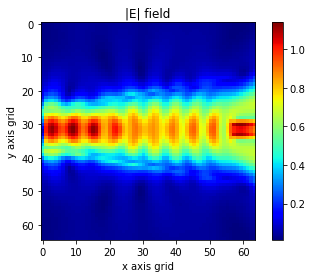

In [7]:
import matplotlib.pyplot as plt
import numpy as np
E = forward_fields.E

index = 0
E_x= np.abs(E[:, :, 0, index, 0])
E_y = np.abs(E[:, :, 0, index, 1])
E_z = np.abs(E[:, :, 0, index, 2])
norm_E = np.sqrt(E_x * E_x + E_y * E_y + E_z * E_z)
plt.imshow(norm_E.transpose(), cmap = 'jet')
plt.xlabel('x axis grid')
plt.ylabel('y axis grid')
plt.title('|E| field')
plt.colorbar()
plt.savefig('norm_E.png')

<Figure size 432x288 with 0 Axes>

Test the interpolation of the FDTD lumerical, we will use two nearest point of E_x to test

In [ ]:
index_wl = 0
index_y = 1
index_x_1 = 1
index_x_2 = 2
Ex_1 = E[index_x_1, index_y, 1, index_wl, 0]
Ex_2 = E[index_x_2, index_y, 1, index_wl, 0]